<a href="https://colab.research.google.com/github/h2o4sure01/Quantium-Customer-Analysis/blob/main/Quantium_Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statements
You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

In [2]:
#import the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

After we imported the libraries, the next thing is load the datasets and print the first five rows of the two dataset we'll be working on

In [3]:
#loading data from google drive
data1 = pd.read_excel('/content/drive/My Drive/ML project/Quantium’s retail analytics/QVI_transaction_data.xlsx')
data2 = pd.read_csv('/content/drive/My Drive/ML project/Quantium’s retail analytics/QVI_purchase_behaviour.csv')
data1.head(5)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
#print out the fist
data2.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


Data1 contain the transaction data and data2 is the customer  purchase behaviour. Let's merge the two datasets together and start our analysis.

In [5]:
df =  data1.merge(data2,how='inner', on='LYLTY_CARD_NBR')
df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [6]:
df.shape

(264836, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [8]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


The **info()** function tells us the kind of data we'll be working on
The **describe()** function gives us a quick understanding of the inferential statistics of data, and from the table above we can we  see the minimum, maximum, standard deviation as well as the 25,50 and 75 percentile of the various columns  excluding  the categorical columns.

**Notice** the PROD_QTY and TOT_SALES has a huge difference in their 75% and maximum which is not right, this means there are outliers in the two columns. 



### Let's check for missing values in the data

In [9]:
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Ok! Good, we dont have any missing values in the data. The next thing we need to do is remove the outliers in PROD_QTY and TOT_SALES.

## Removing Outliers.

Outliers are the values in dataset which standouts from the rest of the data. The outliers can be a result of error in reading, fault in the system, manual error or misreading

To understand outliers with the help of an example: If every student in a class scores less than or equal to 100 in an assignment but one student scores more than 100 in that exam then he is an outlier in the Assignment score for that class

For any analysis or statistical tests, we need to remove outliers from our data as part of data pre-processing

Any outlier in data may give a biased or invalid results which can impact your Analysis and further processing.

First let's deal with the PROD_QTY column.

In [10]:
df['PROD_QTY'].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

From the above output, we can see we have data point from 1-5 then an outliers which is 200. Since we know that the PROD_QTY ranges from 1-5, We can then remove the outlier by selecting only the data point that has PROD_QTY ranging from 1-5.

In [11]:
df = df.loc[df['PROD_QTY'].abs()<=5]
df['PROD_QTY'].value_counts()

2    236039
1     27518
5       450
3       430
4       397
Name: PROD_QTY, dtype: int64

Cool, we've dealt with the outliers. Now let's start exploring the data

## Exploratory Data Analysis (EDA)

In [12]:
#let's remove unecessary columns
df = df.drop(['LYLTY_CARD_NBR','TXN_ID','PROD_NBR','DATE'],1)
df.head()

,STORE_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,1,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,1,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,1,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,1,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,1,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


<Figure size 1008x1008 with 0 Axes>

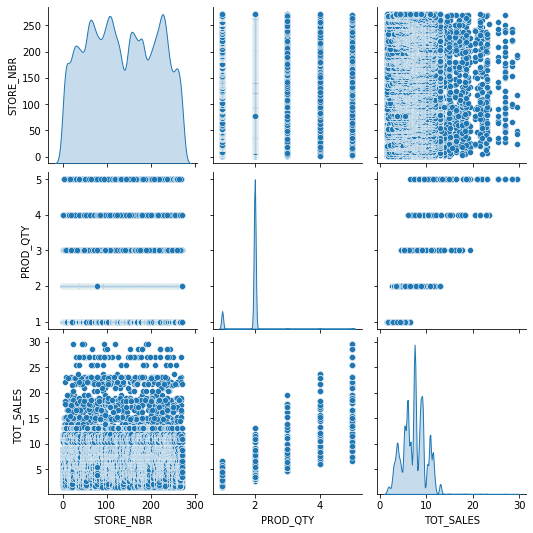

In [13]:
plt.figure(figsize=(14, 14))

sns.pairplot(df, diag_kind='kde');


In [28]:
# show
most_sold_prod = df.groupby(['PROD_NAME','LIFESTAGE']).agg({'TOT_SALES':'sum'}).reset_index()
most_sold_prod= most_sold_prod.sort_values('TOT_SALES', ascending=False)
top_20 =most_sold_prod.head(20)
top_20


,PROD_NAME,LIFESTAGE,TOT_SALES
80,Dorito Corn Chp Supreme 380g,OLDER SINGLES/COUPLES,8459.75
605,Smiths Crnkle Chip Orgnl Big Bag 380g,OLDER SINGLES/COUPLES,7528.40
81,Dorito Corn Chp Supreme 380g,RETIREES,7527.00
542,Smiths Crinkle Chips Salt & Vinegar 330g,OLDER SINGLES/COUPLES,7182.00
535,Smiths Crinkle Original 330g,OLDER SINGLES/COUPLES,7130.70
45,Cheezels Cheese 330g,OLDER SINGLES/COUPLES,7119.30
248,Kettle Sea Salt And Vinegar 175g,OLDER SINGLES/COUPLES,7036.20
606,Smiths Crnkle Chip Orgnl Big Bag 380g,RETIREES,7026.90
227,Kettle Honey Soy Chicken 175g,OLDER SINGLES/COUPLES,7025.40
234,Kettle Mozzarella Basil & Pesto 175g,OLDER SINGLES/COUPLES,6987.60


In [ ]:
ct = pd.crosstab(df.period, df.mark)

ct.plot.bar(stacked=True)
plt.legend(title='mark')

In [39]:
most_patronize_store = df.groupby('STORE_NBR').agg({'TOT_SALES':'sum'}).reset_index()
most_patronize_store = most_patronize_store.sort_values('STORE_NBR', ascending=False)
top_10 =most_patronize_store.head(10)
top_10

,STORE_NBR,TOT_SALES
271,272,4653.95
270,271,9721.80
269,270,11293.95
268,269,11221.80
267,268,2601.05
266,267,275.40
265,266,1742.70
264,265,2433.40
263,264,2519.80
262,263,300.50


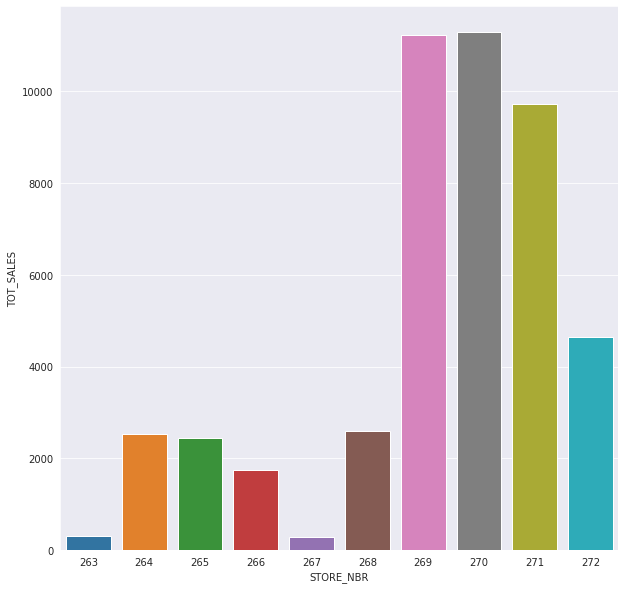

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 10))
sns.barplot(x='STORE_NBR', y=top_10['TOT_SALES'], data=top_10 )

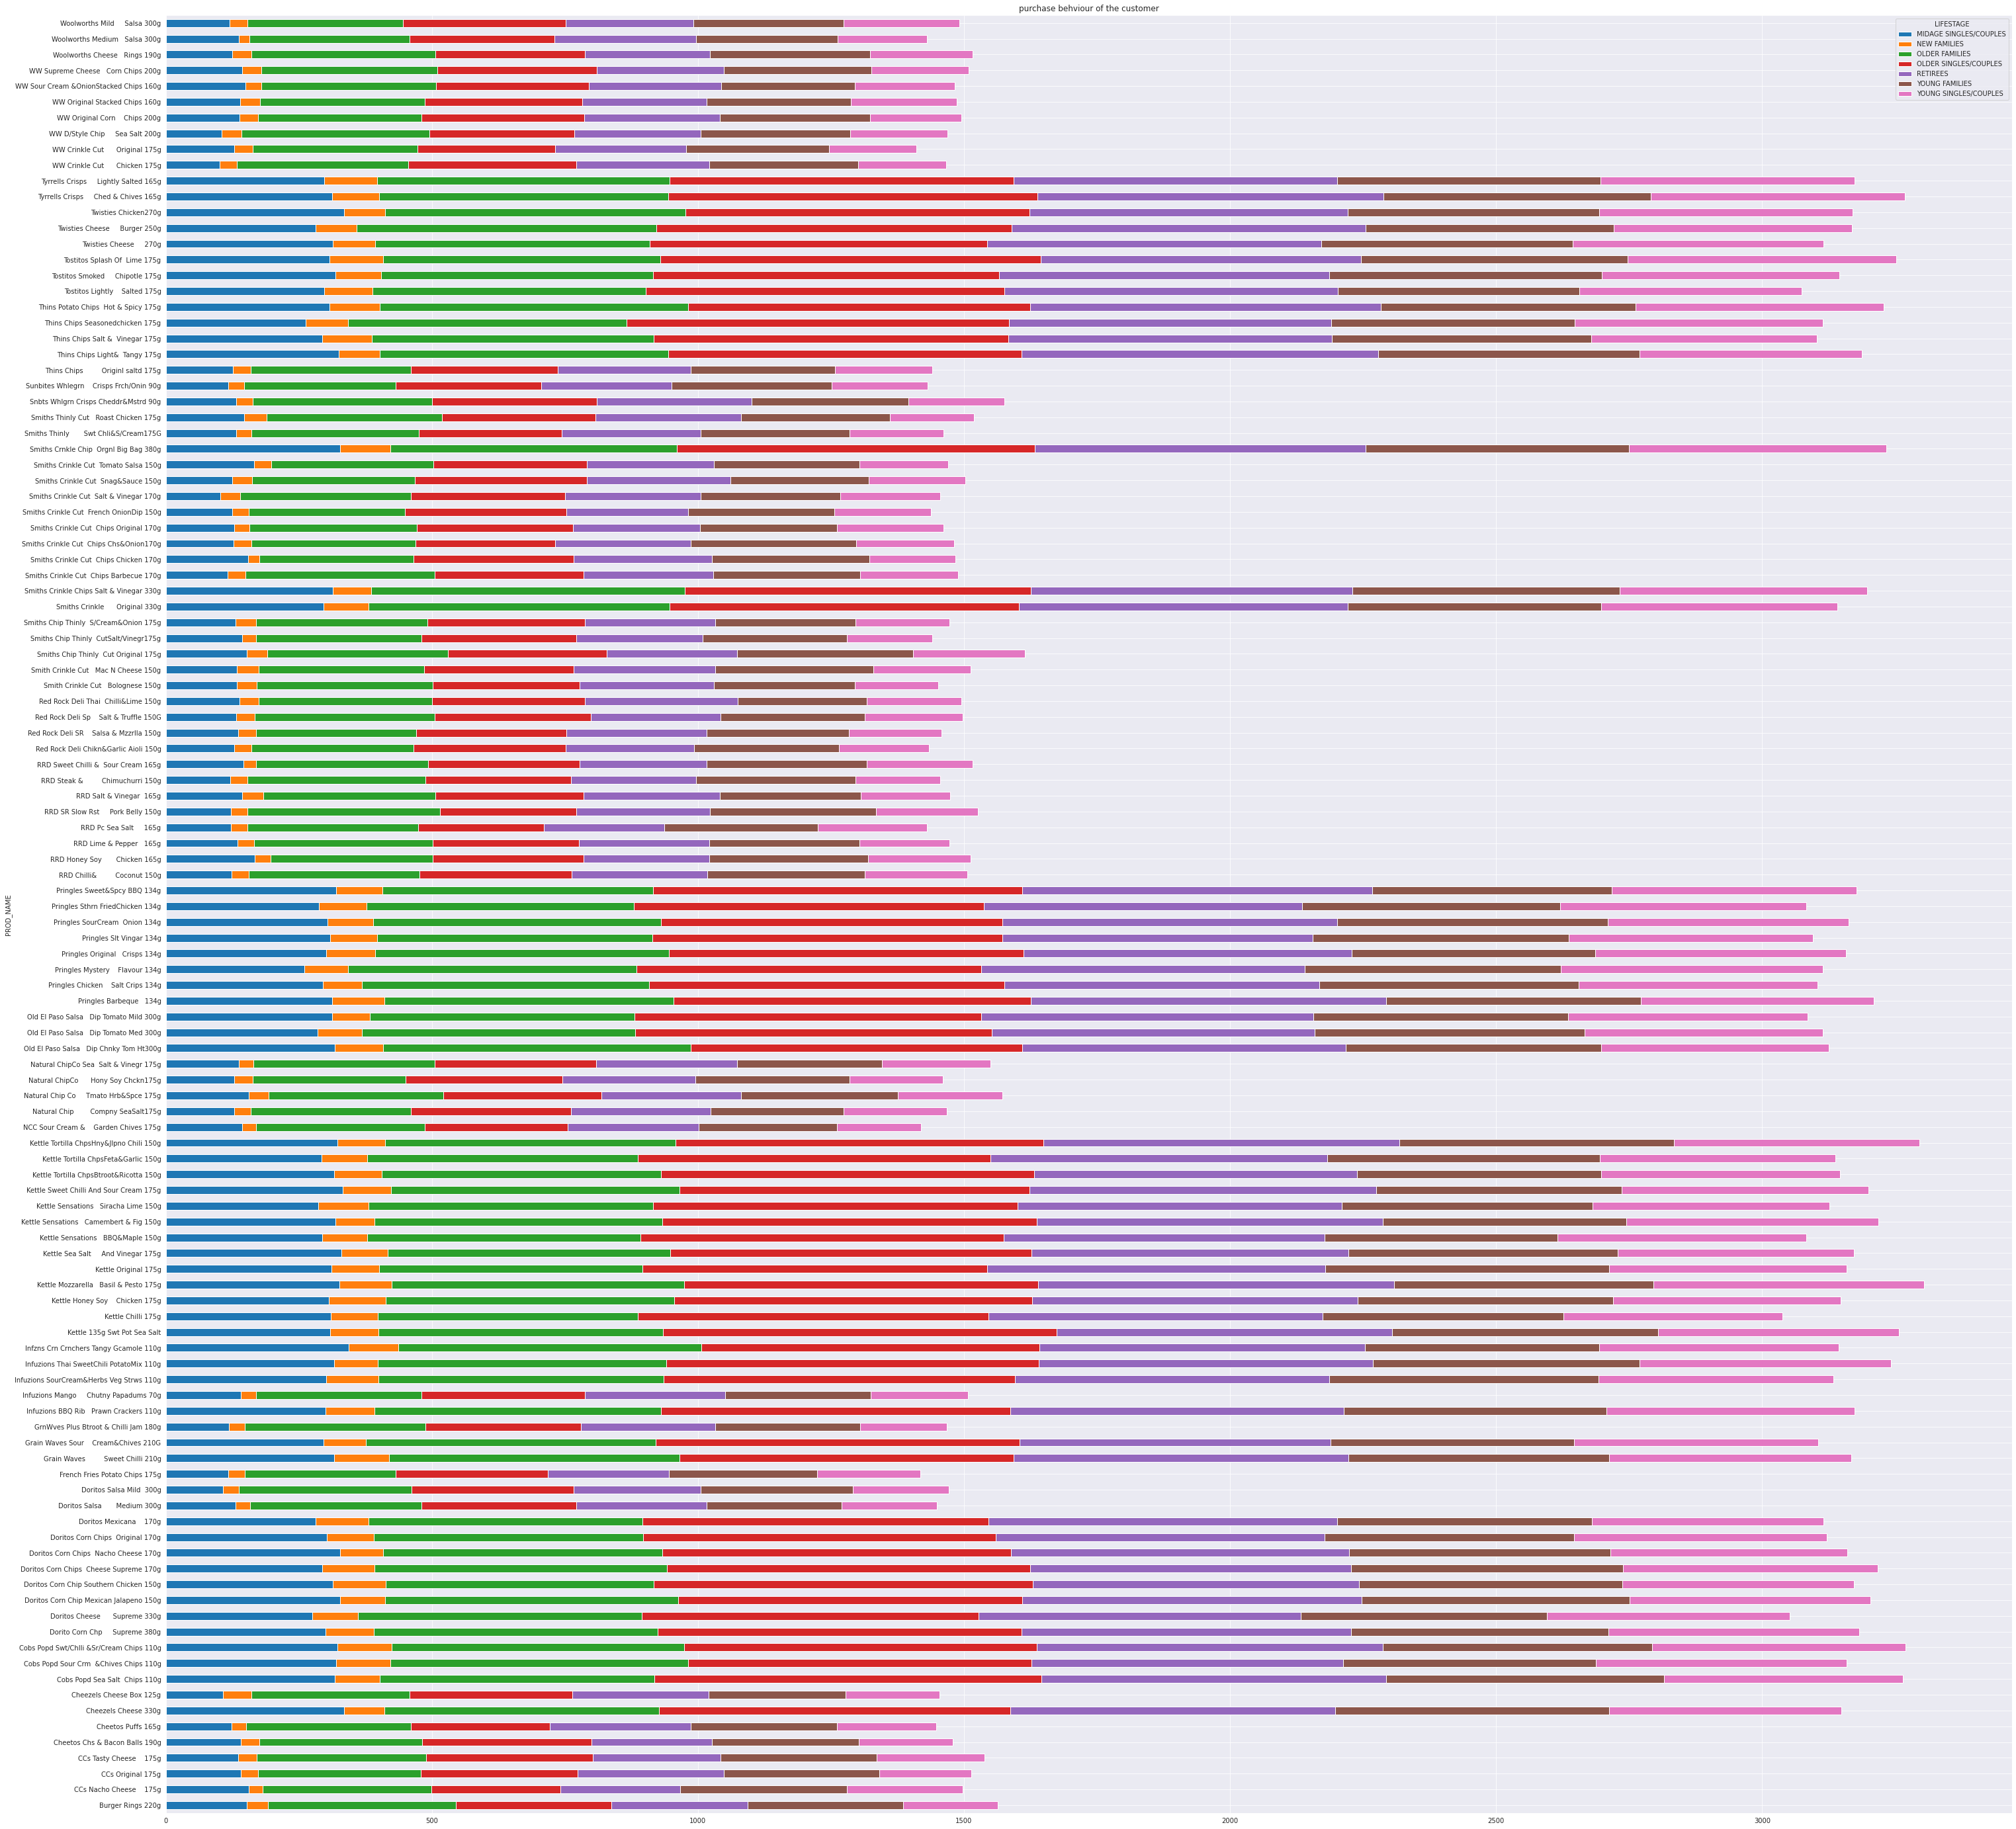

In [71]:
ct = pd.crosstab(df.PROD_NAME, df.LIFESTAGE)

ct.plot.barh(stacked=True,figsize=(50, 50))
plt.legend(title='LIFESTAGE')

In [68]:
most_bought_prod = df.groupby('PROD_NAME').agg({'TOT_SALES':'sum'}).reset_index()
most_bought_prod =most_bought_prod.sort_values('PROD_NAME', ascending=False)
most_bought_prod

,PROD_NAME,TOT_SALES
113,Woolworths Mild Salsa 300g,4234.5
112,Woolworths Medium Salsa 300g,4050.0
111,Woolworths Cheese Rings 190g,5169.6
110,WW Supreme Cheese Corn Chips 200g,5390.3
109,WW Sour Cream &OnionStacked Chips 160g,5323.8
...,...,...
4,Cheetos Chs & Bacon Balls 190g,9243.3
3,CCs Tasty Cheese 175g,6069.0
2,CCs Original 175g,6048.0
1,CCs Nacho Cheese 175g,5961.9


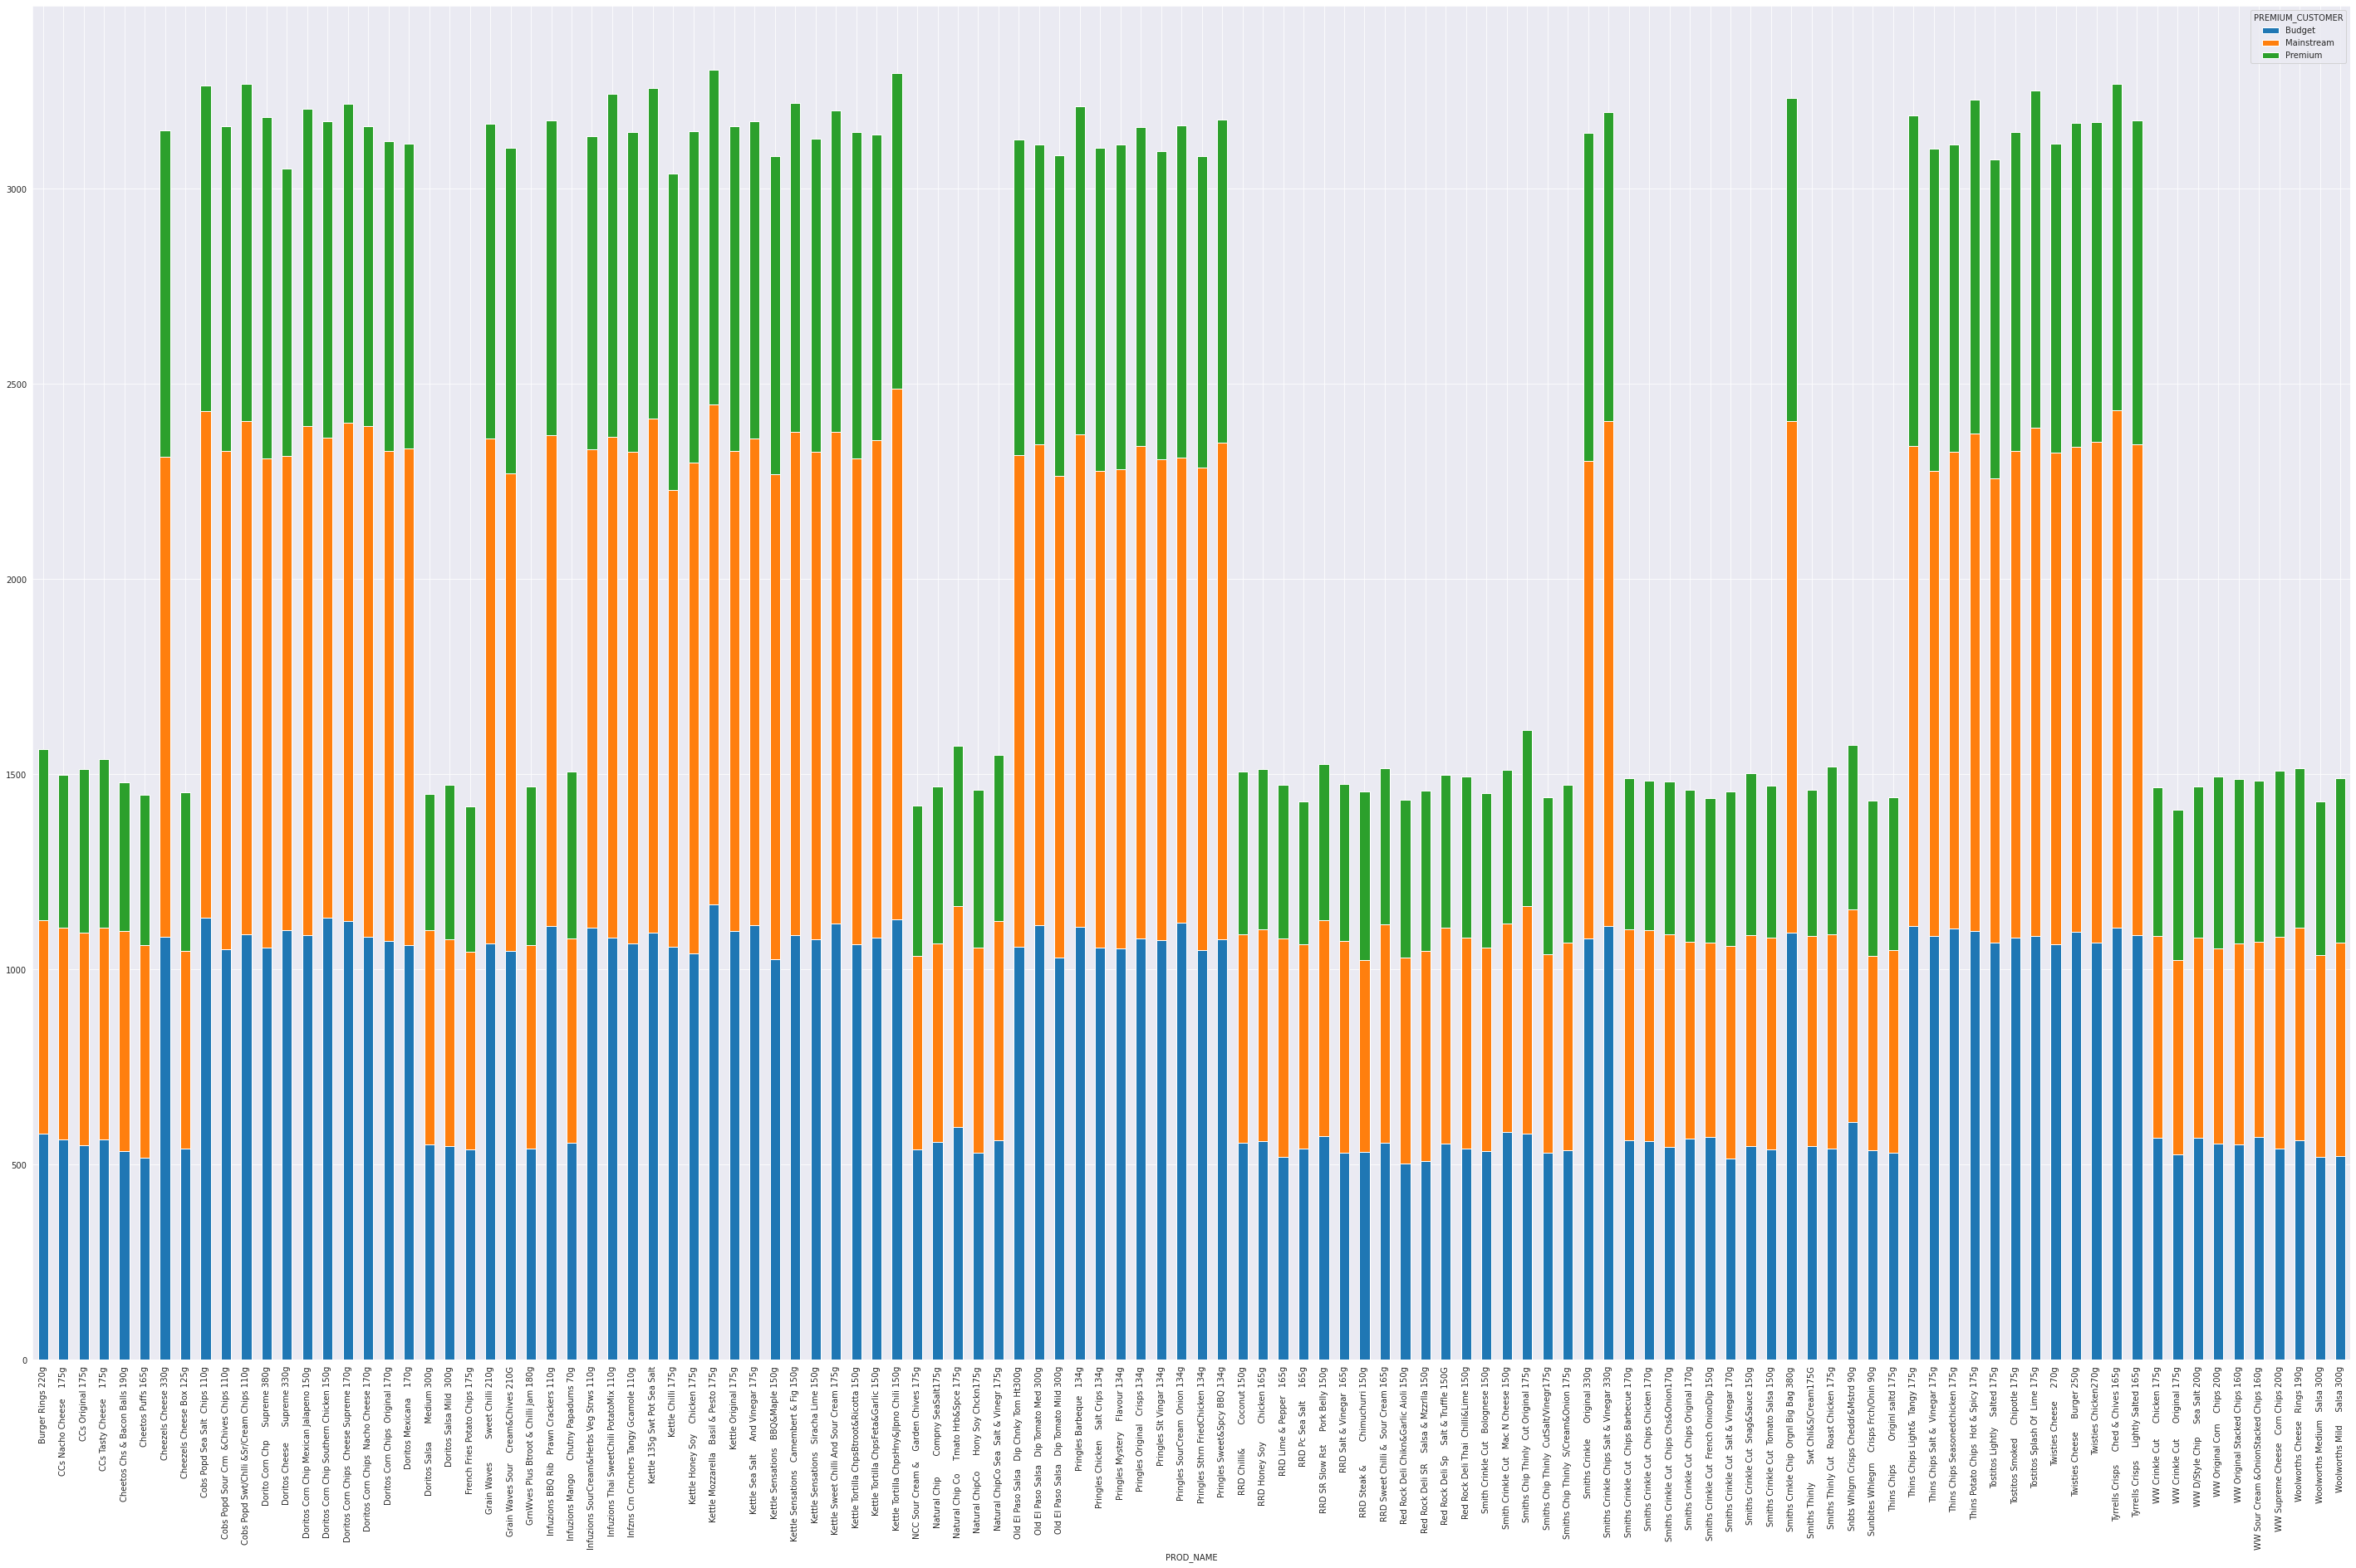

In [60]:

most_bought_prod = pd.crosstab(df.PROD_NAME, df.PREMIUM_CUSTOMER)

most_bought_prod.plot.bar(stacked=True,figsize=(50, 30))

plt.legend(title='PREMIUM_CUSTOMER')